In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
raw_data_ = pd.read_excel("CCM_D_I_CIQ_raw_2.xlsx")

In [3]:
raw_data = raw_data_

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71953 entries, 0 to 71952
Data columns (total 38 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   GV_Key                                                      71953 non-null  object        
 1   Date_cal                                                    71953 non-null  datetime64[ns]
 2   Ticker Symbol                                               71927 non-null  object        
 3   Company Name                                                71953 non-null  object        
 4   Quarter                                                     71953 non-null  object        
 5   Fiscal Data Year and Quarter                                71947 non-null  object        
 6   Final Date                                                  71943 non-null  datetime64[ns]
 7   Date_rep              

In [5]:
#check null values of columns Price, Market Cap and Betas, Revenues
#drop Share Price NAs
indices_to_drop = raw_data[(raw_data.Share_Price.isna()) | (raw_data.Share_Price == 0) | (raw_data.Market_Cap.isna()) | (raw_data.Revenue == 0)].GV_Key
print(len(indices_to_drop))

6058


In [6]:
raw_data = raw_data.set_index('GV_Key')
raw_data = raw_data.drop(indices_to_drop, axis = 0)
raw_data = raw_data.drop(['NI_1y_Growth', 'NI_2y_Growth'], axis = 1)
raw_data = raw_data.reset_index()

In [7]:
raw_data.columns

Index(['GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name', 'Quarter',
       'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep', 'Assets',
       'Cash', 'Common Shares Used to Calculate Earnings Per Share - Basic',
       'Long-Term Debt', 'Invested Capital', 'Liabilities', 'Net Income',
       'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'Market Value',
       'HQ', 'is_na', 'Share_Price', 'Share_Price_BD', 'Div_Per_Share_Ann',
       'Div_Yield', 'Market_Cap', 'Beta_1Y', 'Beta_2Y', 'Beta_5Y',
       'Rev_1y_Growth', 'Rev_2y_Growth', 'Primary Industry', 'Industry Sector',
       'Industry Group', 'Industry'],
      dtype='object')

In [8]:
#calculate all ratios, margins, metrics and multiples
#raw_data["Shares_out"] = raw_data["Market_Cap"] / raw_data["Share_Price"]
raw_data["Shares_out"] = raw_data["Common Shares Used to Calculate Earnings Per Share - Basic"]
raw_data["EBIT_Margin"] = raw_data["EBIT"] / raw_data["Revenue"]
raw_data["EBITDA_Margin"] = raw_data["EBITDA"] / raw_data["Revenue"]
raw_data["Profit_Margin"] = raw_data["Net Income"] / raw_data["Revenue"]
raw_data["Leverage"] = raw_data["Long-Term Debt"] / raw_data["Assets"]
raw_data["Debt/Assets"] = raw_data["Liabilities"] / raw_data["Assets"]
raw_data["Cash/Assets"] = raw_data["Cash"] / raw_data["Assets"]
raw_data["ROE"] = raw_data["Net Income"] / raw_data["Stockholders Equity"]
raw_data["P/B"] = raw_data["Market_Cap"] / raw_data["Stockholders Equity"]
raw_data["P/Sales"] = raw_data["Share_Price"] / (raw_data["Revenue"] / raw_data["Shares_out"])
raw_data["P/EBITDA"] = raw_data["Share_Price"] / (raw_data["EBITDA"] / raw_data["Shares_out"])
raw_data["P/EBIT"] = raw_data["Share_Price"] / (raw_data["EBIT"] / raw_data["Shares_out"])
raw_data["P/E"] = raw_data["Share_Price"] / (raw_data["Net Income"] / raw_data["Shares_out"])
raw_data["Rev_1y_Growth"] = raw_data["Rev_1y_Growth"]/100
raw_data["Rev_2y_Growth"] = raw_data["Rev_2y_Growth"]/100

#testing purposes
#raw_data["P/E"] = raw_data["Market_Cap"] / raw_data["Net Income"]

In [9]:
raw_data = raw_data.drop(['Market Value', 'Common Shares Used to Calculate Earnings Per Share - Basic', 'is_na'], axis = 1)

In [10]:
#number of companies
len(raw_data.GV_Key.unique().tolist())

3279

In [11]:
num_cols = ['Assets',
       'Cash', 'Long-Term Debt', 'Invested Capital', 'Liabilities',
       'Net Income', 'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity',
       'Share_Price', 'Div_Per_Share_Ann', 'Div_Yield', 'Market_Cap',
       'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth', 'Rev_2y_Growth', 'Shares_out',
       'EBIT_Margin', 'EBITDA_Margin', 'Profit_Margin', 'Leverage',
       'Debt/Assets', 'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA',
       'P/EBIT', 'P/E']

In [12]:
raw_data[num_cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Assets,62535.0,1.359507e+04,6.886301e+04,8.170000e-01,307.731000,1452.734000,6134.968000,2.416676e+06
Cash,62535.0,9.503095e+02,5.636132e+03,0.000000e+00,23.750500,107.413000,413.703000,2.886060e+05
Long-Term Debt,62535.0,3.442712e+03,1.290991e+04,-4.020000e-01,20.850000,345.443000,1939.690000,2.829750e+05
Invested Capital,62535.0,7.450957e+03,2.727196e+04,-4.155651e+03,210.112500,1012.230000,4210.937000,6.343710e+05
Liabilities,62535.0,9.585699e+03,5.775845e+04,0.000000e+00,121.158000,767.513000,3861.371500,2.214838e+06
Net Income,62535.0,1.262190e+02,9.549427e+02,-4.974600e+04,-4.918000,6.075000,61.637000,3.964600e+04
EBIT,62535.0,2.107769e+02,1.131150e+03,-6.232500e+04,-1.489500,16.320000,107.500000,4.972300e+04
EBITDA,62535.0,3.164646e+02,1.408171e+03,-5.974000e+04,0.418000,30.060000,160.683500,5.242800e+04
Revenue,62535.0,1.666525e+03,6.459358e+03,-9.010000e+03,38.245500,211.817000,894.768500,1.492040e+05
Stockholders Equity,62535.0,3.989437e+03,1.667884e+04,-1.807500e+04,103.395500,527.092000,1970.954000,5.168650e+05


In [13]:
raw_data.columns

Index(['GV_Key', 'Date_cal', 'Ticker Symbol', 'Company Name', 'Quarter',
       'Fiscal Data Year and Quarter', 'Final Date', 'Date_rep', 'Assets',
       'Cash', 'Long-Term Debt', 'Invested Capital', 'Liabilities',
       'Net Income', 'EBIT', 'EBITDA', 'Revenue', 'Stockholders Equity', 'HQ',
       'Share_Price', 'Share_Price_BD', 'Div_Per_Share_Ann', 'Div_Yield',
       'Market_Cap', 'Beta_1Y', 'Beta_2Y', 'Beta_5Y', 'Rev_1y_Growth',
       'Rev_2y_Growth', 'Primary Industry', 'Industry Sector',
       'Industry Group', 'Industry', 'Shares_out', 'EBIT_Margin',
       'EBITDA_Margin', 'Profit_Margin', 'Leverage', 'Debt/Assets',
       'Cash/Assets', 'ROE', 'P/B', 'P/Sales', 'P/EBITDA', 'P/EBIT', 'P/E'],
      dtype='object')

In [14]:
#Analysing infinite values

#raw_data = raw_data.applymap(lambda x: np.inf if x == 'inf' else (-np.inf if x == '-inf' else x))
#display(raw_data[num_cols])

print(raw_data[num_cols].apply(lambda x: np.isinf(x).sum()))

Assets                  0
Cash                    0
Long-Term Debt          0
Invested Capital        0
Liabilities             0
Net Income              0
EBIT                    0
EBITDA                  0
Revenue                 0
Stockholders Equity     0
Share_Price             0
Div_Per_Share_Ann       0
Div_Yield               0
Market_Cap              0
Beta_1Y                 0
Beta_2Y                 0
Beta_5Y                 0
Rev_1y_Growth           0
Rev_2y_Growth           0
Shares_out              0
EBIT_Margin             0
EBITDA_Margin           0
Profit_Margin           0
Leverage                0
Debt/Assets             0
Cash/Assets             0
ROE                     0
P/B                     0
P/Sales                 0
P/EBITDA                8
P/EBIT                  8
P/E                    15
dtype: int64


In [15]:
len(raw_data)

62535

In [16]:
raw_data[np.isinf(raw_data['EBIT_Margin'])][['Company Name', 'Quarter', 'Revenue', 'EBIT', 'EBITDA', 'EBIT_Margin', 'EBITDA_Margin' , 'P/Sales']].to_clipboard()

Removing outliers

Text(0.5, 1.0, 'P/B before outlier reduction')

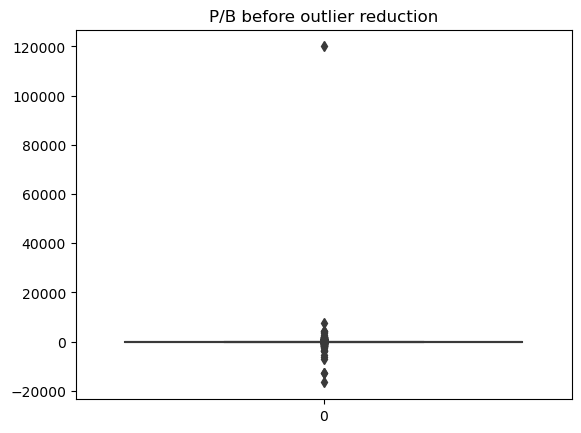

In [36]:
ax = sns.boxplot(data=raw_data['P/B'], palette="crest")
plt.title('P/B before outlier reduction')

Text(0.5, 1.0, 'EBITDA-Margin (%/100) before outlier reduction')

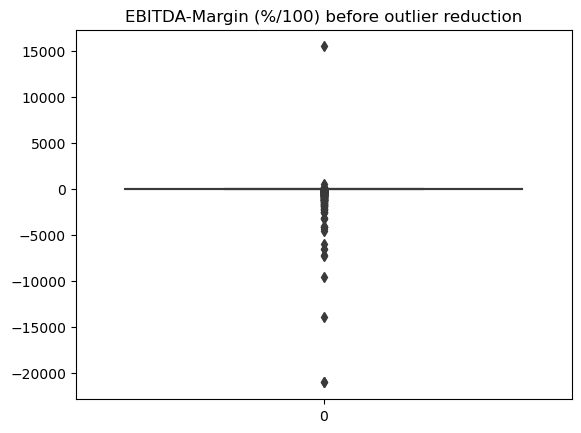

In [41]:
ax = sns.boxplot(data=raw_data['EBITDA_Margin'], palette="crest")
plt.title('EBITDA-Margin (%/100) before outlier reduction')

In [25]:
len(raw_data[raw_data['P/B'] > raw_data['P/B'].quantile(0.99)].GV_Key)

626

In [26]:
raw_data = raw_data.reset_index()

In [19]:
#plotting features before removing outliers

In [27]:
outliers = []

for col in num_cols:
    data = raw_data[col]
    q_low = data.quantile(0.005)
    q_high = data.quantile(0.995)
    
    try:
        raw_data['is_outlier'] = np.where((data > q_high) | (data < q_low) | (raw_data['is_outlier'] == 1),1,0)
        
    except:
        raw_data['is_outlier'] = np.where((data > q_high) | (data < q_low),1,0)
    
    group = raw_data.groupby(['GV_Key'])['is_outlier'].sum()
    for indx, values in group.items():
        if values != 0:
            outliers.append(indx)
    #cleaned_data[col] = cleaned_data[(cleaned_data[col] < q_high) & (cleaned_data[col] > q_low)]

In [29]:
outliers = list(set(outliers))
len(outliers)

1751

In [30]:
raw_data = raw_data.set_index('GV_Key')

In [31]:
data_no_outliers = raw_data.drop(outliers, axis = 0)
data_no_outliers = data_no_outliers.reset_index()

In [32]:
len(data_no_outliers.GV_Key.unique().tolist())

1528

In [33]:
data_no_outliers[['P/B', 'P/E']].describe()

,P/B,P/E
count,29411.000000,29411.000000
mean,3.709869,65.134023
std,5.087519,456.383498
min,-48.688559,-7163.023975
25%,1.431484,11.427967
50%,2.470959,55.273896
75%,4.341066,105.856334
max,89.511395,9599.953275


Text(0.5, 1.0, 'P/B after outlier reduction')

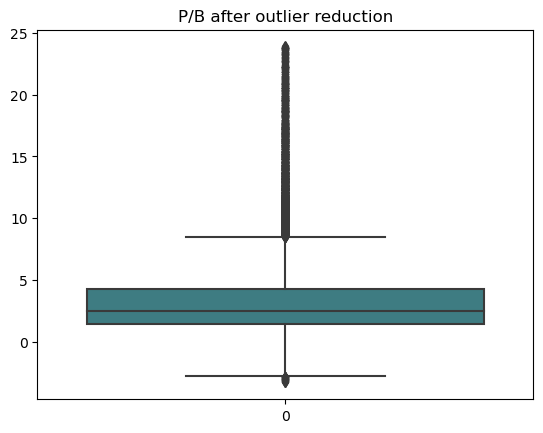

In [42]:
plot_data_no_outliers = data_no_outliers[(data_no_outliers['P/B'] <= data_no_outliers['P/B'].quantile(0.99)) 
                                        & (data_no_outliers['P/B'] >= data_no_outliers['P/B'].quantile(0.01))]

ax = sns.boxplot(data=plot_data_no_outliers['P/B'], palette="crest")
plt.title('P/B after outlier reduction')

Text(0.5, 1.0, 'EBITDA-Margin (%/100) after outlier reduction')

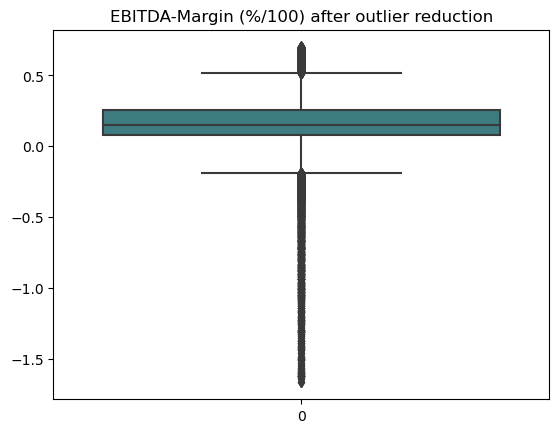

In [44]:
plot_data_no_outliers = data_no_outliers[(data_no_outliers['EBITDA_Margin'] <= data_no_outliers['EBITDA_Margin'].quantile(0.99)) 
                                        & (data_no_outliers['EBITDA_Margin'] >= data_no_outliers['EBITDA_Margin'].quantile(0.01))]

ax = sns.boxplot(data=plot_data_no_outliers['EBITDA_Margin'], palette="crest")
plt.title('EBITDA-Margin (%/100) after outlier reduction')

In [46]:
#raw_data[raw_data['P/B'] == raw_data['P/B'].max()].to_clipboard()

In [47]:
#raw_data.groupby(['GV_Key'])['is_outlier'].sum().reset_index().sort_values(by='is_outlier', ascending=False)

In [48]:
#number of outliers (99% quantile)
len(data_no_outliers[data_no_outliers['P/B'] > data_no_outliers['P/B'].quantile(0.99)].GV_Key)

295

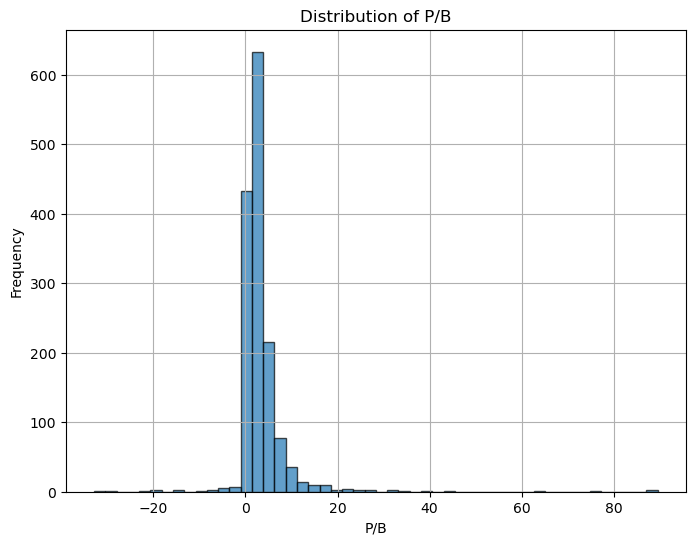

In [49]:
#plot P/B distribution
plt.figure(figsize=(8, 6))
plt.hist(data_no_outliers[data_no_outliers.Quarter == '2022Q4']['P/B'], bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('P/B')
plt.ylabel('Frequency')
plt.title('Distribution of P/B')
plt.grid(True)
plt.show()

In [50]:
data_995 = data_no_outliers
data_995[['GV_Key', 'Quarter']].describe()

,GV_Key,Quarter
count,29411,29411
unique,1528,24
top,GV_001076,2022Q3
freq,24,1490


In [51]:
data_995.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29411 entries, 0 to 29410
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   GV_Key                        29411 non-null  object        
 1   index                         29411 non-null  int64         
 2   Date_cal                      29411 non-null  datetime64[ns]
 3   Ticker Symbol                 29411 non-null  object        
 4   Company Name                  29411 non-null  object        
 5   Quarter                       29411 non-null  object        
 6   Fiscal Data Year and Quarter  29409 non-null  object        
 7   Final Date                    29409 non-null  datetime64[ns]
 8   Date_rep                      29411 non-null  datetime64[ns]
 9   Assets                        29411 non-null  float64       
 10  Cash                          29411 non-null  float64       
 11  Long-Term Debt              

In [52]:
#data_995.to_clipboard()

In [53]:
#data_995.to_excel("feature_matrix_995.xlsx")
#data_99.to_excel(r"C:\Users\Dani\Dropbox\Mein PC (dimotion-PC)\Documents\BA_data\Feature Matrix\feature_matrix_99.xlsx")

## Attempt of interpolation

In [163]:
#interpolate growth rates
#data_995.reset_index(inplace = True)
indices_to_interpolate = data_995[data_995.Rev_1y_Growth.isna() | data_995.Rev_2y_Growth.isna()].GV_Key

In [164]:
indices_to_interpolate

4383     GV_007938
4387     GV_007938
4391     GV_007938
7657     GV_012719
7658     GV_012719
7662     GV_012719
7665     GV_012719
7666     GV_012719
14156    GV_027251
15988    GV_030098
15992    GV_030098
18422    GV_035053
18426    GV_035053
18798    GV_035552
18799    GV_035552
18802    GV_035552
18803    GV_035552
18806    GV_035552
18807    GV_035552
19424    GV_036776
20401    GV_038632
23718    GV_065009
25131    GV_116772
25132    GV_116772
25133    GV_116772
Name: GV_Key, dtype: object

In [173]:
data_995.GV_Key[data_995.GV_Key.isin(list(indices_to_interpolate))]

4383     GV_007938
4384     GV_007938
4385     GV_007938
4386     GV_007938
4387     GV_007938
           ...    
25150    GV_116772
25151    GV_116772
25152    GV_116772
25153    GV_116772
25154    GV_116772
Name: GV_Key, Length: 166, dtype: object

In [177]:
def interpolate_category(category_df, method='linear', col = col):
    # Interpolate only for rows with NaN values in the 'Value' column
    category_df[col] = category_df[col].interpolate(method=method)
    return category_df

companies_to_interpolate = data_995.GV_Key[data_995.GV_Key.isin(list(set(indices_to_interpolate)))]
interpolated_dfs = []

for company in companies_to_interpolate:
    company_df = data_995[data_995.GV_Key == company].copy()
    company_df = interpolate_category(company_df, col = 'Rev_1y_Growth')
    interpolated_dfs.append(company_df)
    


In [180]:
data_interpol = pd.concat(interpolated_dfs, ignore_index = True)

In [182]:
data_interpol.to_clipboard()

In [151]:
for col in ['Rev_1y_Growth', 'Rev_2y_Growth']:
    for i in list(set(indices_to_interpolate)):
        data_995[data_995.GV_Key == i].Rev_1y_Growth.fillna(method = 'ffill', inplace = True)

C:\Users\Dani\AppData\Local\Temp\ipykernel_19016\3615325366.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_995[data_995.GV_Key == i].Rev_1y_Growth.fillna(method = 'ffill', inplace = True)


In [152]:
data_995[data_995.GV_Key == 'GV_007938'].Rev_1y_Growth

4383         NaN
4384   -0.802929
4385   -0.721610
4386   -0.056743
4387         NaN
4388   -0.007415
4389    0.184419
4390    0.292017
4391    0.339846
4392    0.341553
4393    0.247218
4394    0.041477
4395   -0.039752
4396   -0.127700
4397   -0.136337
4398   -0.089071
4399   -0.019086
4400    0.104828
4401    0.254469
4402    0.493755
4403    0.484726
4404    0.483514
4405    0.370187
4406    0.259963
Name: Rev_1y_Growth, dtype: float64

In [150]:
data_995.to_clipboard()